/tmp/ipykernel_92503/2850241833.py:20: RuntimeWarning: divide by zero encountered in log
  return np.log(np.array(x)), np.log(np.array(spectra))
/tmp/ipykernel_92503/2850241833.py:20: RuntimeWarning: invalid value encountered in log
  return np.log(np.array(x)), np.log(np.array(spectra))


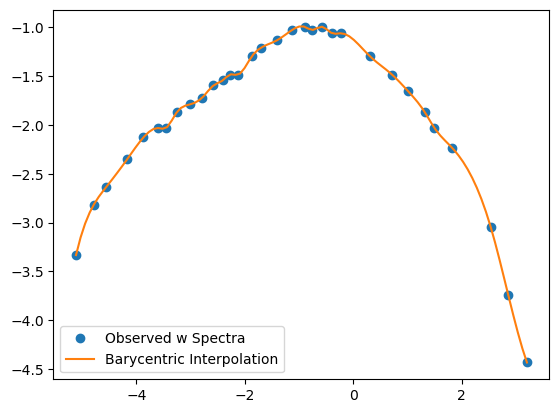

In [42]:
import numpy as np 
import csv
from pathlib import Path 

import matplotlib as mpl 
import matplotlib.pyplot as plt

from scipy.interpolate import barycentric_interpolate, CubicSpline

# === Data Loading ===
# print(Path().resolve())
def extract_x_spectra(filepath):
    x, spectra = [], [] 
    with open(filepath) as spectra_csv: 
        csv_reader = csv.reader(spectra_csv, delimiter=',')
        for row in csv_reader:
            x.append(float(row[0])) 
            spectra.append(float(row[1])) 

    return np.log(np.array(x)), np.log(np.array(spectra))

x_coords_u, u_spectra = extract_x_spectra(Path().resolve() / "data" / "u_spectra.csv")
x_coords_v, v_spectra = extract_x_spectra(Path().resolve() / "data" / "v_spectra.csv")
x_coords_w, w_spectra = extract_x_spectra(Path().resolve() / "data" / "w_spectra.csv")
x_coords_uw, uw_cospectra = extract_x_spectra(Path().resolve() / "data" / "uw_cospectra.csv")

x_interp = np.linspace(min(x_coords_w), max(x_coords_w), 100)
# y = barycentric_interpolate(x_coords_w, w_spectra, x_interp)
cs = CubicSpline(x_coords_w, w_spectra)
y_interp = cs(x_interp)
plt.plot(x_coords_w, w_spectra, "o", label="Observed w Spectra")
plt.plot(x_interp, y_interp, label="Cubic Spline Interpolation")
# plt.yscale('log')
# plt.xscale('log')
plt.legend()

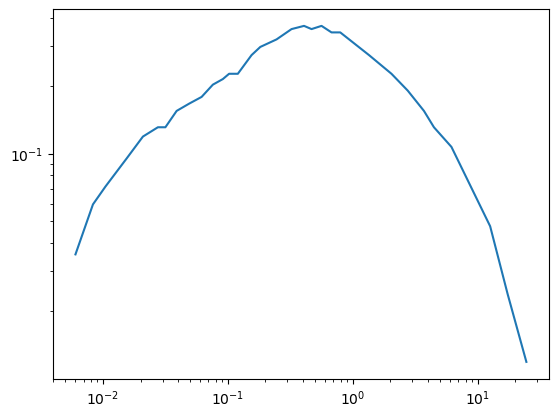

In [30]:
plt.plot(x_coords_w, w_spectra)
plt.yscale('log')
plt.xscale('log')

/tmp/ipykernel_92503/3840354386.py:3: RuntimeWarning: invalid value encountered in log
  x_coords_w, w_spectra = np.log(x_coords_w), np.log(w_spectra)


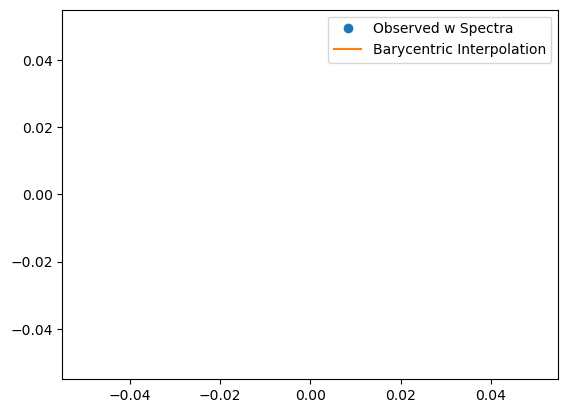